# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

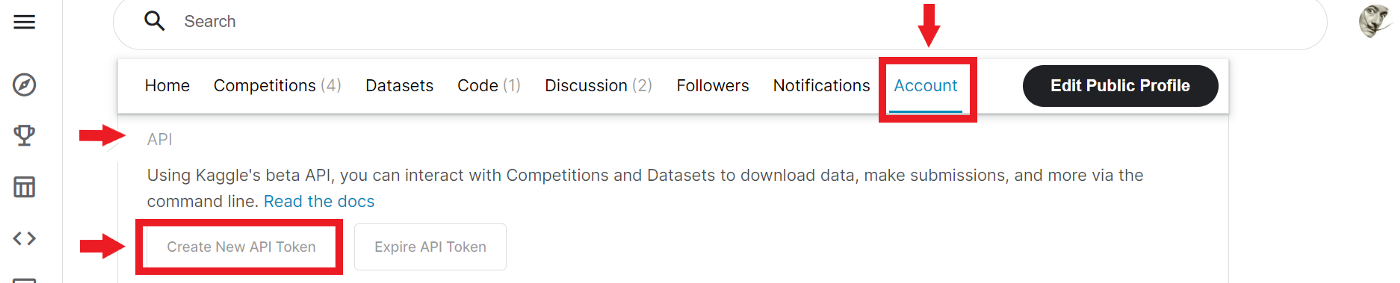

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [61]:
# !pip install -q kaggle
# !rm -rf kaggle.json
# from google.colab import files

# files.upload()


Crie a pasta .kaggle

In [62]:
# !rm -rf ~/.kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json

import os
import shutil

# Caminho padrão no Windows
kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")

# Remove a pasta .kaggle se já existir
if os.path.exists(kaggle_dir):
    shutil.rmtree(kaggle_dir)

# Cria a pasta .kaggle novamente
os.makedirs(kaggle_dir, exist_ok=True)

# Copia o kaggle.json para lá
shutil.copy("kaggle.json", os.path.join(kaggle_dir, "kaggle.json"))

# Opcional: restringe permissões no Windows (simula chmod 600)
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

print("Arquivo kaggle.json configurado com sucesso!")

Arquivo kaggle.json configurado com sucesso!


Baixe o dataset

In [63]:
# !kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

dataset = 'marlesson/news-of-the-site-folhauol'
api.dataset_download_files(dataset, path='.', unzip=True, force=True)

print("Download concluído!")


Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
Download concluído!


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [64]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("articles.csv")
df.head()

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [65]:
!pip install spacy
!python -m spacy download pt_core_news_lg

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.6 which is incompatible.
evidently 0.4.40 requires numpy<2.1,>=1.22.0, but you have numpy 2.2.6 which is incompatible.
matplotlib 3.7.5 requires numpy<2,>=1.20, but you have numpy 2.2.6 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.6 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.6 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.2.6 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but yo

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/568.2 MB ? eta -:--:--
      -------------------------------------- 9.4/568.2 MB 53.7 MB/s eta 0:00:11
     - ------------------------------------ 21.0/568.2 MB 63.1 MB/s eta 0:00:09
     -- ----------------------------------- 31.5/568.2 MB 62.4 MB/s eta 0:00:09
     -- ----------------------------------- 42.2/568.2 MB 53.7 MB/s eta 0:00:10
     --- ---------------------------------- 55.3/568.2 MB 55.9 MB/s eta 0:00:10
     ---- --------------------------------- 68.7/568.2 MB 57.6 MB/s eta 0:00:09
     ---- --------------------------------- 73.4/568.2 MB 60.0 MB/s eta 0:00:09
     ----- -------------------------------- 78.1/568.2 MB 49.3 MB/s eta 0:00:10
     ------ ------------------------------- 91.0/568.2 MB 50.9 MB/s eta 0:00:10
     ------ ------------------------------ 104.1/568.2 MB 52.3 MB/s eta 0:00:09
     ------ ------------------------------ 104.9/

## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [66]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to C:\Users\Bruno
[nltk_data]     Adalberto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Bruno
[nltk_data]     Adalberto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Bruno
[nltk_data]     Adalberto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package rslp to C:\Users\Bruno
[nltk_data]     Adalberto\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## Carregar os módulos usados ao longo desse notebook

In [67]:
!pip install pyldavis 

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 123

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [68]:
df['date'] = pd.to_datetime(df.date)

news_2016 = df[df['date'].dt.year == 2016]
news_2016 = news_2016[news_2016['category'] == 'mercado']

news_2016.dropna() 
news_2016.drop_duplicates(keep='last') 

#confirmação se o filtro foi de fato aplicado.
print(news_2016['date'].dt.year.unique())
news_2016.count()

[2016]


title          7943
text           7943
date           7943
category       7943
subcategory       0
link           7943
dtype: int64

## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem).
Para tal, complete o conteúdo da função `tokenize`.

In [69]:
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
import re

def clear_text(text):
  if isinstance(text, str):
          text = text.lower()
          text = re.sub(r"\d+", "", text)
          text = re.sub(r"[^\w\s]", "", text)
          return text
  return ""


def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`

  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """

  try:
      text = clear_text(text)
      if not text:
          return []
      tokens = word_tokenize(text)
      stemmer = RSLPStemmer()
      stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalpha()]
      return stemmed_tokens
  except Exception as e:
      print(f"Erro no texto: {text}, Tipo: {type(text)}, Erro: {e}")
      return [] 

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [70]:
# Escreva seu código aqui
# ...
# news_2016.loc[:, 'spacy_doc'] = ...(complete)

nlp = spacy.load("pt_core_news_lg")
news_2016['text'] = news_2016['text'].fillna('').astype(str)

def create_spacy_docs(texts):
    docs = list(tqdm(nlp.pipe(texts), total=len(texts), desc="Processando textos com SpaCy"))
    return docs

news_2016.loc[:, 'spacy_doc'] = create_spacy_docs(news_2016['text'])

Processando textos com SpaCy:   0%|          | 0/7943 [00:00<?, ?it/s]

## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [71]:
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    undesired = {"o", "em", "em o", "em a", "ano", "dizer", "país", 
                 "afirmar", "di", "data", "setor", "voltar", "passar", "levar", "trocar",
                 "anterior", "fazer", "ficar", "listar", "chegar", "caso", "necessario", "haver", "ser", 
                 "poder", "dia", "informar", "hoje", "ir", "bom", "precisar", "ante"}
    return w.is_alpha and w.text.lower() not in complete_stopwords and w.lemma_.lower() not in undesired and len(w.text) > 2


def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """
    tokens = [w.lemma_.lower() for w in doc if filter(w)]
    return tokens if tokens else ['vazio']

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)
news_2016 = news_2016[news_2016.spacy_lemma.map(lambda x: len(x) > 2)]

  0%|          | 0/7943 [00:00<?, ?it/s]

## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [72]:
def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  return [ent.text for ent in doc.ents if ent.label_ == "ORG"]
 

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER) 

  0%|          | 0/7943 [00:00<?, ?it/s]

## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF.
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos.

In [73]:
class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None


  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      docs = [' '.join(tokens) for tokens in self.doc_tokens]
      self.vectorizer_model = TfidfVectorizer(
                  max_features=5000,
                  min_df=10
              )
      self.tfidf = self.vectorizer_model.fit(docs)
      return self.tfidf

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array =  vectorizer().transform([tokens]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [74]:
N_TOKENS = 9

corpus = np.array(news_2016.tfidf.tolist())
lda = LDA(
    n_components=N_TOKENS,
    max_iter=100,
    random_state=SEED,
    n_jobs=-1,
)

lda.fit(corpus)

LatentDirichletAllocation(max_iter=100, n_components=9, n_jobs=-1,
                          random_state=123)

In [75]:
def mostrar_top_palavras(modelo, vectorizer, n_top_palavras=10):
    # Verifica qual método está disponível para obter os nomes das features
    if hasattr(vectorizer, "get_feature_names_out"):
        palavras = vectorizer.get_feature_names_out()
    else:
        palavras = vectorizer.get_feature_names()  # para compatibilidade

    topicos = []
    for idx, topico in enumerate(modelo.components_):
        top_palavras = [palavras[i] for i in topico.argsort()[-n_top_palavras:][::-1]]
        print(f"Topico #{idx}: {', '.join(top_palavras)}")
        topicos.append(top_palavras)
    return topicos

topicos = mostrar_top_palavras(lda, vectorizer(), n_top_palavras=10)

Topico #0: trimestre, queda, pib, inflação, comparação, ibge, taxa, passado, resultado, alta
Topico #1: empresa, bilhão, milhão, brasil, companhia, mercado, banco, venda, acordo, investimento
Topico #2: governo, proposta, temer, ministro, bilhão, presidente, público, estado, medida, gasto
Topico #3: dólar, índice, juro, mercado, banco, alta, bolsa, ação, subir, queda
Topico #4: gasolina, diesel, litro, etanol, combustível, feirão, bomba, anp, biocombustível, botijão
Topico #5: contribuinte, declaração, ficha, restituição, rendimento, receita, cpf, dependente, declarar, imposto
Topico #6: aéreo, aeroporto, voo, passageiro, aviação, embraer, aeronave, avião, gol, infraero
Topico #7: estácio, kroton, ensino, aluno, abengoa, diniz, zaher, educacional, fies, distância
Topico #8: petróleo, barri, produção, opep, editora, pág, autor, irã, saudita, petroleira


### Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [76]:
def get_topic(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    # Escreva seu código aqui
    topic_distribution = lda.transform(tfidf.reshape(1, -1))   
    return int(np.argmax(topic_distribution))

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [77]:
resumo_topicos = pd.DataFrame({
    'topico': range(len(topicos)),
    'top_palavras': [", ".join(p) for p in topicos],
})
resumo_topicos['n_textos'] = resumo_topicos['topico'].map(news_2016['topic'].value_counts()).fillna(0).astype(int)

display(resumo_topicos.sort_values("n_textos", ascending=False))


,topico,top_palavras,n_textos
1,1,"empresa, bilhão, milhão, brasil, companhia, me...",4819
2,2,"governo, proposta, temer, ministro, bilhão, pr...",1672
3,3,"dólar, índice, juro, mercado, banco, alta, bol...",992
0,0,"trimestre, queda, pib, inflação, comparação, i...",325
5,5,"contribuinte, declaração, ficha, restituição, ...",80
8,8,"petróleo, barri, produção, opep, editora, pág,...",37
6,6,"aéreo, aeroporto, voo, passageiro, aviação, em...",17
4,4,"gasolina, diesel, litro, etanol, combustível, ...",1
7,7,"estácio, kroton, ensino, aluno, abengoa, diniz...",0


## Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

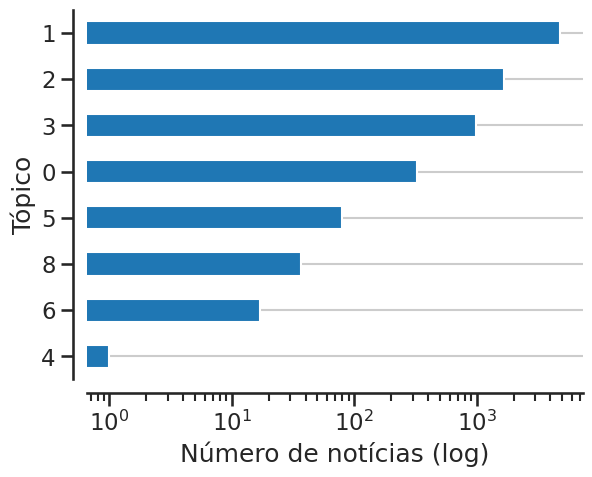

In [78]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

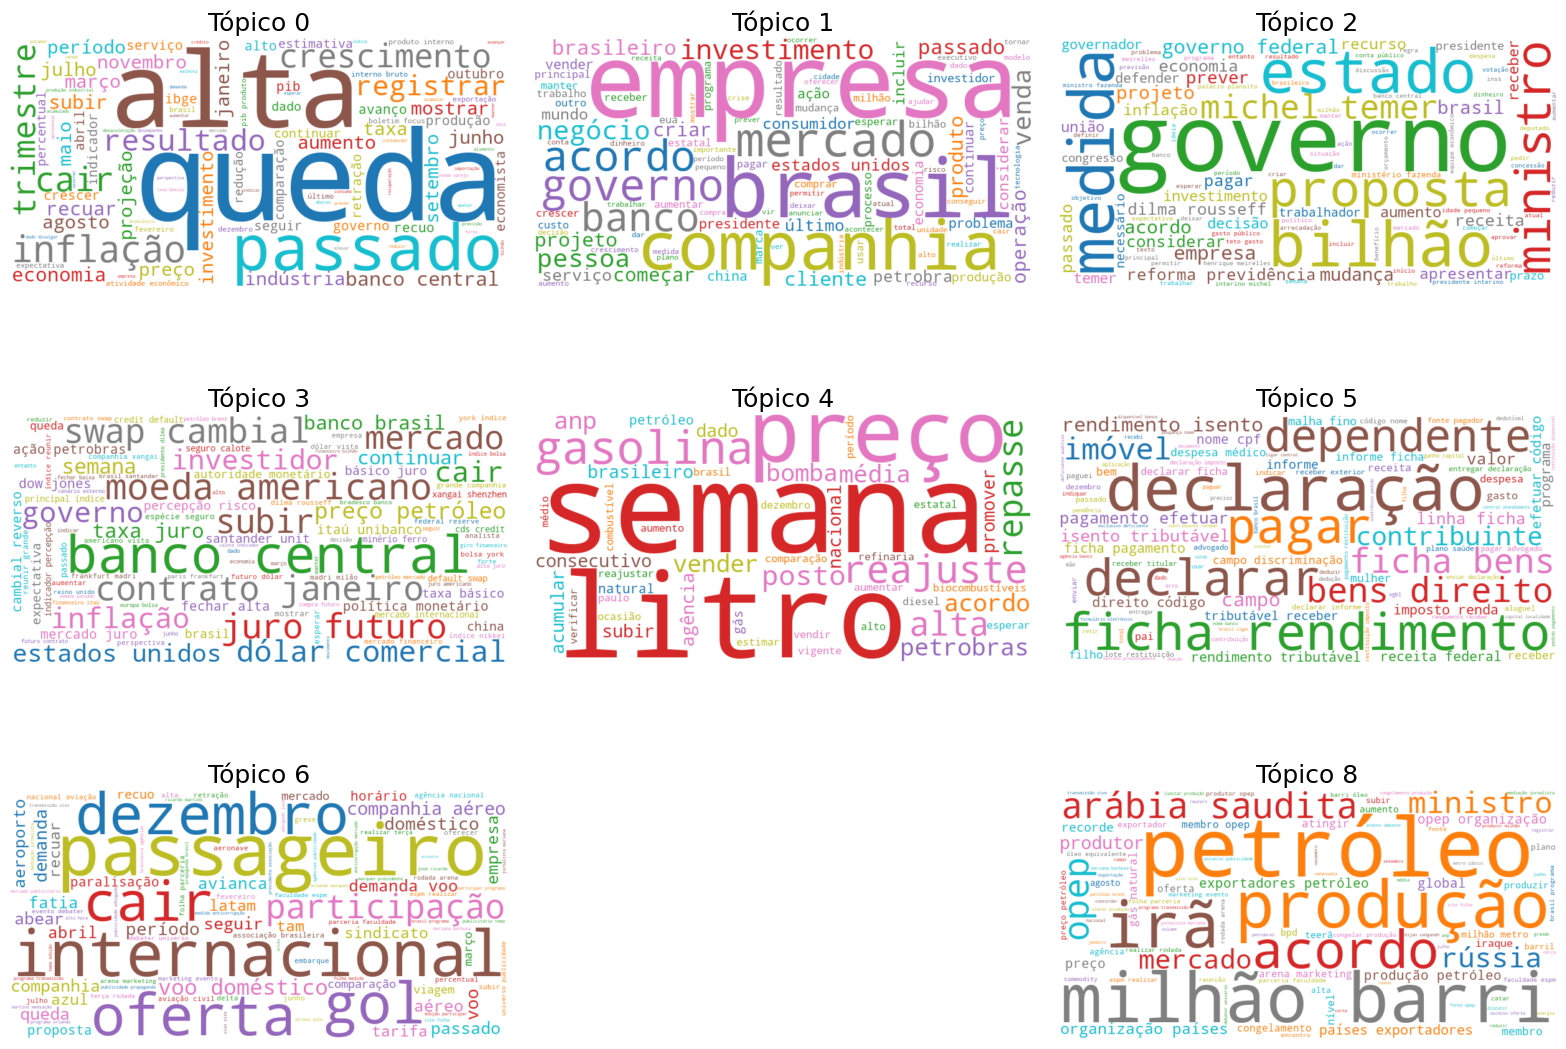

In [79]:
def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    wordcloud = WordCloud(
        background_color='white',
        width=800,
        height=400,
        max_words=100,
        colormap='tab10'        
    ).generate(text)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    return ax

def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx}")
fig.tight_layout()

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

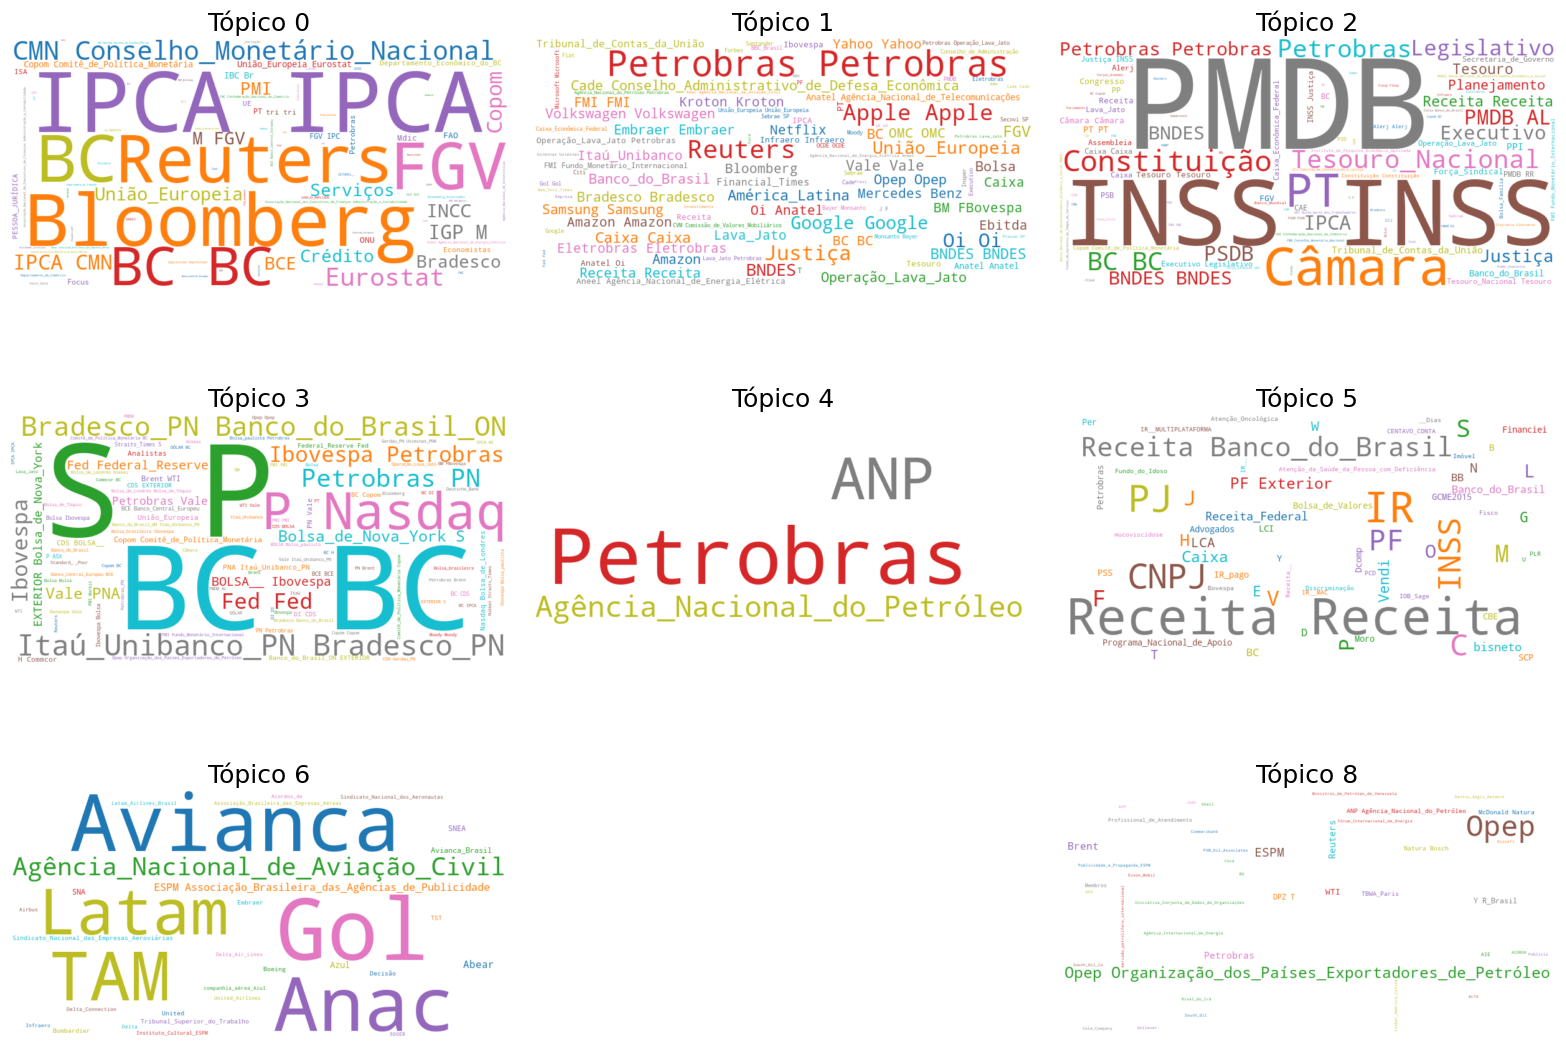

In [80]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete) and len(string_complete) <= 2:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx  , ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx  }")
fig.tight_layout()